### Importing Libraries

In [1]:
# prompt: code to connect with drive

from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [2]:
! pip install pandas
! pip install numpy
! pip install scikit-learn
! pip install lightgbm
! pip install xgboost
! pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.7 MB/s eta 0:00:00


In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

### Loading and Viewing Data

In [2]:
#df = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/ensemble/data/driking_dataset_Ver01.csv")
df = pd.read_csv("../data/driking_dataset_Ver01.csv")
df.head()

,sex,age,height,weight,waistline,sight_left,sight_right,hear_left,hear_right,SBP,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,90.0,1.0,1.0,1.0,1.0,120.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,89.0,0.9,1.2,1.0,1.0,130.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,91.0,1.2,1.5,1.0,1.0,120.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,91.0,1.5,1.2,1.0,1.0,145.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,80.0,1.0,1.2,1.0,1.0,138.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


## Understanding the data and Preprocessing

In [ ]:
# Display the first few rows
print("🔹 Head of the DataFrame:")
print(df.head(), "\n")

# Display the column names
print("🔹 Columns in the DataFrame:")
print(df.columns, "\n")

# Display DataFrame info
print("🔹 Info about the DataFrame:")
print(df.info())

#Display Description of data
print("🔹 Description of the DataFrame:")
print(df.describe(),"\n")

# Display the number of data points
print("Number of data points:")
print(len(df), "\n")

# Display the number of features
print("🔹 Number of features:" )
print(len(df.columns), "\n")

# Display feature types
print("🔹 Data type of each feature:")
print(df.dtypes, "\n")

# Display the number of missing values in each column
print("🔹 Number of missing values in each column:")
print(df.isnull().sum(), "\n")

# Display the number of unique values in each column
print("🔹 Number of unique values in each column:")
print(df.nunique(), "\n")


🔹 Head of the DataFrame:
    sex  age  height  weight  waistline  sight_left  sight_right  hear_left  \
0  Male   35     170      75       90.0         1.0          1.0        1.0   
1  Male   30     180      80       89.0         0.9          1.2        1.0   
2  Male   40     165      75       91.0         1.2          1.5        1.0   
3  Male   50     175      80       91.0         1.5          1.2        1.0   
4  Male   50     165      60       80.0         1.0          1.2        1.0   

   hear_right    SBP  ...  LDL_chole  triglyceride  hemoglobin  urine_protein  \
0         1.0  120.0  ...      126.0          92.0        17.1            1.0   
1         1.0  130.0  ...      148.0         121.0        15.8            1.0   
2         1.0  120.0  ...       74.0         104.0        15.8            1.0   
3         1.0  145.0  ...      104.0         106.0        17.6            1.0   
4         1.0  138.0  ...      117.0         104.0        13.8            1.0   

   serum_crea

In [3]:
# Calculate BMI
bmi = df['weight'] / ((df['height'] / 100) ** 2)

# Find the index of the 'weight' column
weight_index = df.columns.get_loc('weight')

# Insert BMI column right after 'weight'
df.insert(loc=weight_index + 1, column='BMI', value=bmi)

In [ ]:
df.head()

,sex,age,height,weight,BMI,waistline,sight_left,sight_right,hear_left,hear_right,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,Male,35,170,75,25.951557,90.0,1.0,1.0,1.0,1.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,Y
1,Male,30,180,80,24.691358,89.0,0.9,1.2,1.0,1.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,N
2,Male,40,165,75,27.548209,91.0,1.2,1.5,1.0,1.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,N
3,Male,50,175,80,26.122449,91.0,1.5,1.2,1.0,1.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,N
4,Male,50,165,60,22.038567,80.0,1.0,1.2,1.0,1.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,N


In [4]:
# Binary encoding
df['sex'] = df['sex'].map({'Male': 1, 'Female': 0})
df['DRK_YN'] = df['DRK_YN'].map({'Y': 1, 'N': 0})

df.head()

,sex,age,height,weight,BMI,waistline,sight_left,sight_right,hear_left,hear_right,...,LDL_chole,triglyceride,hemoglobin,urine_protein,serum_creatinine,SGOT_AST,SGOT_ALT,gamma_GTP,SMK_stat_type_cd,DRK_YN
0,1,35,170,75,25.951557,90.0,1.0,1.0,1.0,1.0,...,126.0,92.0,17.1,1.0,1.0,21.0,35.0,40.0,1.0,1
1,1,30,180,80,24.691358,89.0,0.9,1.2,1.0,1.0,...,148.0,121.0,15.8,1.0,0.9,20.0,36.0,27.0,3.0,0
2,1,40,165,75,27.548209,91.0,1.2,1.5,1.0,1.0,...,74.0,104.0,15.8,1.0,0.9,47.0,32.0,68.0,1.0,0
3,1,50,175,80,26.122449,91.0,1.5,1.2,1.0,1.0,...,104.0,106.0,17.6,1.0,1.1,29.0,34.0,18.0,1.0,0
4,1,50,165,60,22.038567,80.0,1.0,1.2,1.0,1.0,...,117.0,104.0,13.8,1.0,0.8,19.0,12.0,25.0,1.0,0


In [5]:
df.columns

Index(['sex', 'age', 'height', 'weight', 'BMI', 'waistline', 'sight_left',
       'sight_right', 'hear_left', 'hear_right', 'SBP', 'DBP', 'BLDS',
       'tot_chole', 'HDL_chole', 'LDL_chole', 'triglyceride', 'hemoglobin',
       'urine_protein', 'serum_creatinine', 'SGOT_AST', 'SGOT_ALT',
       'gamma_GTP', 'SMK_stat_type_cd', 'DRK_YN'],
      dtype='object')

## Ranking Features

In [ ]:
# Use 'DRK_YN' as the target variable
X = df.drop('DRK_YN', axis=1)
y = df['DRK_YN']

# If there are any other categorical columns (besides 'sex'), encode them
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# =============================
# 1. Random Forest Feature Importance
# =============================
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns)

# =============================
# 2. Mutual Information
# =============================
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_importances = pd.Series(mi_scores, index=X.columns)

# =============================
# 3. Permutation Importance
# =============================
perm_results = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_importances = pd.Series(perm_results.importances_mean, index=X.columns)

# =============================
# Combine Rankings (Average Rank)
# =============================
# Convert each method's importance into rank (lower rank = more important)
rf_rank = rf_importances.rank(ascending=False)
mi_rank = mi_importances.rank(ascending=False)
perm_rank = perm_importances.rank(ascending=False)

# Average rank
avg_rank = (rf_rank + mi_rank + perm_rank) / 3
final_ranking = avg_rank.sort_values()

# Display final feature ranking
print("\n📊 Final Feature Ranking (Average Rank from 3 Methods):")
print(final_ranking)


📊 Final Feature Ranking (Average Rank from 3 Methods):
SMK_stat_type_cd     3.666667
age                  4.333333
gamma_GTP            4.333333
sex                  5.000000
height               6.333333
hemoglobin           6.666667
HDL_chole           10.666667
SGOT_ALT            11.666667
triglyceride        11.666667
LDL_chole           12.333333
waistline           14.000000
weight              14.000000
BMI                 14.333333
SGOT_AST            14.666667
serum_creatinine    15.000000
BLDS                15.333333
DBP                 15.666667
urine_protein       16.000000
tot_chole           16.666667
hear_right          17.000000
hear_left           17.000000
SBP                 17.000000
sight_left          17.333333
sight_right         19.333333
dtype: float64


# Made Sample from main dataset for better and faster feature ranking

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import mutual_info_classif
from sklearn.inspection import permutation_importance
from sklearn.preprocessing import LabelEncoder

# ====== Step 1: Sample the data (30% stratified by target to keep class balance) =======
sample_frac = 0.3
df_sample, _ = train_test_split(
    df,
    train_size=sample_frac,
    stratify=df['DRK_YN'],
    random_state=42
)

print(f"Sampled data shape: {df_sample.shape}")
print(df_sample['DRK_YN'].value_counts(normalize=True))

# ====== Step 2: Prepare features and target =======
X = df_sample.drop('DRK_YN', axis=1)
y = df_sample['DRK_YN']

# Encode categorical variables if any (excluding already encoded 'sex')
for col in X.select_dtypes(include='object').columns:
    le = LabelEncoder()
    X[col] = le.fit_transform(X[col])

# ====== Step 3: Train-test split =======
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# ====== Step 4: Random Forest Feature Importance =======
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)
rf_importances = pd.Series(rf.feature_importances_, index=X.columns)

# ====== Step 5: Mutual Information =======
mi_scores = mutual_info_classif(X_train, y_train, random_state=42)
mi_importances = pd.Series(mi_scores, index=X.columns)

# ====== Step 6: Permutation Importance =======
perm_results = permutation_importance(rf, X_test, y_test, n_repeats=10, random_state=42)
perm_importances = pd.Series(perm_results.importances_mean, index=X.columns)

# ====== Step 7: Combine Rankings (Average Rank) =======
rf_rank = rf_importances.rank(ascending=False)
mi_rank = mi_importances.rank(ascending=False)
perm_rank = perm_importances.rank(ascending=False)

avg_rank = (rf_rank + mi_rank + perm_rank) / 3
final_ranking = avg_rank.sort_values()

print("\n📊 Final Feature Ranking (Average Rank from 3 Methods):")
print(final_ranking)


Sampled data shape: (297403, 25)
DRK_YN
0    0.500187
1    0.499813
Name: proportion, dtype: float64

📊 Final Feature Ranking (Average Rank from 3 Methods):
gamma_GTP            2.666667
age                  3.666667
SMK_stat_type_cd     4.333333
hemoglobin           5.666667
sex                  5.666667
height               6.000000
HDL_chole            9.666667
SGOT_ALT            11.000000
LDL_chole           12.666667
serum_creatinine    13.666667
BMI                 13.666667
waistline           13.666667
weight              14.000000
tot_chole           14.666667
SGOT_AST            14.666667
triglyceride        15.333333
sight_left          16.000000
sight_right         16.333333
hear_left           17.000000
SBP                 17.333333
urine_protein       17.333333
hear_right          17.666667
DBP                 17.666667
BLDS                19.666667
dtype: float64


## Selecting Primary Ensemble Learning

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    VotingClassifier, BaggingClassifier,
    RandomForestClassifier, GradientBoostingClassifier,
    StackingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import classification_report
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import StackingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier # Import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

# Label Encoding for categorical features
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop("DRK_YN", axis=1)
y = df["DRK_YN"]

# Use 20% of data for training/testing
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.2, random_state=42, stratify=y)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42)

# Base models
clf1 = LogisticRegression(solver='liblinear', max_iter=1000)
clf2 = DecisionTreeClassifier()
clf3 = KNeighborsClassifier()
clf4 = SVC(probability=True, kernel='linear')
clf5 = GaussianNB()
clf6 = RandomForestClassifier()
clf7 = XGBClassifier(tree_method='hist', predictor='gpu_predictor', use_label_encoder=False, eval_metric='logloss')  # GPU
clf8 = LGBMClassifier(device='cuda')
clf9 = CatBoostClassifier(task_type="GPU", devices='0')

percentage = round((X_sample.shape[0] / X.shape[0]) * 100, 2)

print(f"Original dataset shape: {X.shape}")
print(f"Sampled dataset shape {percentage} %: {X_sample.shape}")
print(f"Training set shape: {X_train.shape}")
print(f"Testing set shape: {X_test.shape}")


Original dataset shape: (991346, 24)
Sampled dataset shape 20.0 %: (198269, 24)
Training set shape: (138788, 24)
Testing set shape: (59481, 24)


In [16]:
# === 1. Voting Classifier ===
voting_clf = VotingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3)],
    voting='soft'
)
voting_clf.fit(X_train, y_train)
y_pred_vote = voting_clf.predict(X_test)
print("\n📌 Voting Classifier Report:\n")
print(classification_report(y_test, y_pred_vote))


📌 Voting Classifier Report:

              precision    recall  f1-score   support

           0       0.69      0.68      0.68     29910
           1       0.68      0.69      0.69     29571

    accuracy                           0.68     59481
   macro avg       0.68      0.68      0.68     59481
weighted avg       0.68      0.68      0.68     59481



In [ ]:
# === 2. Bagging Classifier ===
bagging_clf = BaggingClassifier(estimator=clf6, n_estimators=100, random_state=42)  # RandomForest
bagging_clf.fit(X_train, y_train)
y_pred_bag = bagging_clf.predict(X_test)

print("\n📌 Bagging Classifier Report (RandomForest):\n")
print(classification_report(y_test, y_pred_bag))

In [9]:
# === 3. Boosting Classifier with XGBoost (GPU) ===
boosting_clf_xgb = clf7  # Already set for GPU
boosting_clf_xgb.fit(X_train, y_train)
y_pred_boost_xgb = boosting_clf_xgb.predict(X_test)
print("\n📌 Boosting Classifier Report (XGBoost - GPU):\n")
print(classification_report(y_test, y_pred_boost_xgb))


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:15:51] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📌 Boosting Classifier Report (XGBoost - GPU):

              precision    recall  f1-score   support

           0       0.74      0.73      0.73     29910
           1       0.73      0.74      0.74     29571

    accuracy                           0.73     59481
   macro avg       0.73      0.73      0.73     59481
weighted avg       0.73      0.73      0.73     59481



In [10]:
# === Boosting Classifier with LightGBM (GPU) ===
print("\n Processing... \n")
boosting_clf_lgbm = clf8
boosting_clf_lgbm.fit(X_train, y_train)
y_pred_boost_lgbm = boosting_clf_lgbm.predict(X_test)
print("\n📌 Boosting Classifier Report (LightGBM - GPU):\n")
print(classification_report(y_test, y_pred_boost_lgbm))


 Processing... 

[LightGBM] [Warning] Using sparse features with CUDA is currently not supported.
[LightGBM] [Info] Number of positive: 69527, number of negative: 69261


LightGBMError: CUDA Tree Learner was not enabled in this build.
Please recompile with CMake option -DUSE_CUDA=1

In [12]:
# === Boosting Classifier with CatBoost (GPU) ===
print("\n Processing... \n")
boosting_clf_cat = clf9
boosting_clf_cat.fit(X_train, y_train)
y_pred_boost_cat = boosting_clf_cat.predict(X_test)
print("\n📌 Boosting Classifier Report (CatBoost - GPU):\n")
print(classification_report(y_test, y_pred_boost_cat))


 Processing... 

Learning rate set to 0.025701
0:	learn: 0.6849562	total: 235ms	remaining: 3m 54s
1:	learn: 0.6772628	total: 252ms	remaining: 2m 5s
2:	learn: 0.6701110	total: 274ms	remaining: 1m 30s
3:	learn: 0.6629469	total: 297ms	remaining: 1m 13s
4:	learn: 0.6564532	total: 331ms	remaining: 1m 5s
5:	learn: 0.6504497	total: 370ms	remaining: 1m 1s
6:	learn: 0.6444766	total: 410ms	remaining: 58.1s
7:	learn: 0.6388048	total: 429ms	remaining: 53.2s
8:	learn: 0.6335670	total: 474ms	remaining: 52.2s
9:	learn: 0.6285454	total: 518ms	remaining: 51.3s
10:	learn: 0.6238366	total: 561ms	remaining: 50.5s
11:	learn: 0.6194749	total: 605ms	remaining: 49.8s
12:	learn: 0.6154188	total: 649ms	remaining: 49.3s
13:	learn: 0.6115662	total: 694ms	remaining: 48.9s
14:	learn: 0.6080403	total: 738ms	remaining: 48.5s
15:	learn: 0.6044438	total: 772ms	remaining: 47.5s
16:	learn: 0.6009921	total: 796ms	remaining: 46.1s
17:	learn: 0.5980366	total: 814ms	remaining: 44.4s
18:	learn: 0.5950061	total: 852ms	remaini

In [14]:
# === 4. Stacking ===

print("\n Processing... \n")
stacking_clf = StackingClassifier(
    estimators=[('lr', clf1), ('dt', clf2), ('knn', clf3), ('xgb', clf7), ('cat', clf9)],
    final_estimator=RandomForestClassifier(),
    passthrough=True
)
stacking_clf.fit(X_train, y_train)
y_pred_stack = stacking_clf.predict(X_test)
print("\n📌 Stacking Classifier Report:\n")
print(classification_report(y_test, y_pred_stack))


 Processing... 



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:20:38] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Learning rate set to 0.025701
0:	learn: 0.6849562	total: 9.68ms	remaining: 9.67s
1:	learn: 0.6772624	total: 18.6ms	remaining: 9.26s
2:	learn: 0.6701107	total: 27.1ms	remaining: 9.01s
3:	learn: 0.6629468	total: 37.8ms	remaining: 9.42s
4:	learn: 0.6564535	total: 48.6ms	remaining: 9.68s
5:	learn: 0.6504500	total: 57.1ms	remaining: 9.46s
6:	learn: 0.6444768	total: 65.5ms	remaining: 9.29s
7:	learn: 0.6388049	total: 73.9ms	remaining: 9.16s
8:	learn: 0.6335680	total: 82.3ms	remaining: 9.06s
9:	learn: 0.6285463	total: 90.8ms	remaining: 8.99s
10:	learn: 0.6238375	total: 99.1ms	remaining: 8.91s
11:	learn: 0.6194757	total: 108ms	remaining: 8.85s
12:	learn: 0.6154200	total: 116ms	remaining: 8.79s
13:	learn: 0.6115674	total: 124ms	remaining: 8.74s
14:	learn: 0.6080414	total: 132ms	remaining: 8.7s
15:	learn: 0.6044452	total: 141ms	remaining: 8.66s
16:	learn: 0.6009932	total: 149ms	remaining: 8.64s
17:	learn: 0.5980375	total: 158ms	remaining: 8.62s
18:	learn: 0.5950065	total: 166ms	remaining: 8.59s
1

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:23:14] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:23:17] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:23:18] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:23:19] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)
/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [05:23:20] WARNING: /works

Streaming output truncated to the last 5000 lines.
16:	learn: 0.6004433	total: 141ms	remaining: 8.16s
17:	learn: 0.5973214	total: 149ms	remaining: 8.14s
18:	learn: 0.5942195	total: 157ms	remaining: 8.12s
19:	learn: 0.5913163	total: 165ms	remaining: 8.1s
20:	learn: 0.5888979	total: 173ms	remaining: 8.08s
21:	learn: 0.5864044	total: 182ms	remaining: 8.08s
22:	learn: 0.5839721	total: 193ms	remaining: 8.21s
23:	learn: 0.5816902	total: 201ms	remaining: 8.17s
24:	learn: 0.5795623	total: 207ms	remaining: 8.07s
25:	learn: 0.5774595	total: 213ms	remaining: 7.99s
26:	learn: 0.5754350	total: 220ms	remaining: 7.91s
27:	learn: 0.5736077	total: 226ms	remaining: 7.84s
28:	learn: 0.5717411	total: 232ms	remaining: 7.77s
29:	learn: 0.5700745	total: 238ms	remaining: 7.7s
30:	learn: 0.5685640	total: 245ms	remaining: 7.64s
31:	learn: 0.5670821	total: 251ms	remaining: 7.59s
32:	learn: 0.5657115	total: 257ms	remaining: 7.54s
33:	learn: 0.5642574	total: 264ms	remaining: 7.49s
34:	learn: 0.5630027	total: 270ms

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import learning_curve

models = {
    "Voting": voting_clf,
    "Bagging": bagging_clf,
    "Boosting_xgb": boosting_clf_xgb,
    "Stacking": stacking_clf
}

predictions = {
    "Voting": y_pred_vote,
    "Bagging": y_pred_bag,
    "Boosting": y_pred_boost_xgb,
    "Stacking": y_pred_stack
}

# === 🧱 1. Plot Confusion Matrices ===
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    cm = confusion_matrix(y_test, predictions[name])
    disp = ConfusionMatrixDisplay(confusion_matrix=cm)
    disp.plot(ax=axes[idx], cmap='Blues', colorbar=False)
    axes[idx].set_title(f"{name} - Confusion Matrix")

plt.tight_layout()
plt.show()

# === 📈 2. Plot Learning Curves ===
fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, (name, model) in enumerate(models.items()):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X_train, y_train, cv=5, scoring='accuracy', n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 5), random_state=42
    )

    train_scores_mean = train_scores.mean(axis=1)
    test_scores_mean = test_scores.mean(axis=1)

    axes[idx].plot(train_sizes, train_scores_mean, label="Train", marker='o')
    axes[idx].plot(train_sizes, test_scores_mean, label="Test", marker='s')
    axes[idx].set_title(f"{name} - Learning Curve")
    axes[idx].set_xlabel("Training Examples")
    axes[idx].set_ylabel("Accuracy")
    axes[idx].legend()
    axes[idx].grid(True)

plt.tight_layout()
plt.show()


# Use Grid Seach CV and find perfect combinations

In [8]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import xgboost as xgb
import lightgbm as lgb
import matplotlib.pyplot as plt
import seaborn as sns


# Label Encoding for categorical features
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop("DRK_YN", axis=1)
y = df["DRK_YN"]

# Sample 40% of the data
X_sample, _, y_sample, _ = train_test_split(X, y, train_size=0.4, random_state=42, stratify=y)

# Split the sample for training and testing
X_train, X_test, y_train, y_test = train_test_split(X_sample, y_sample, test_size=0.3, random_state=42, stratify=y_sample)


In [9]:
xgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

lgb_param_grid = {
    'n_estimators': [50, 100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'num_leaves': [31, 50, 100],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [13:54:08] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Best XGBoost Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}

📌 XGBoost Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.73      0.74     59503
           1       0.74      0.75      0.74     59459

    accuracy                           0.74    118962
   macro avg       0.74      0.74      0.74    118962
weighted avg       0.74      0.74      0.74    118962



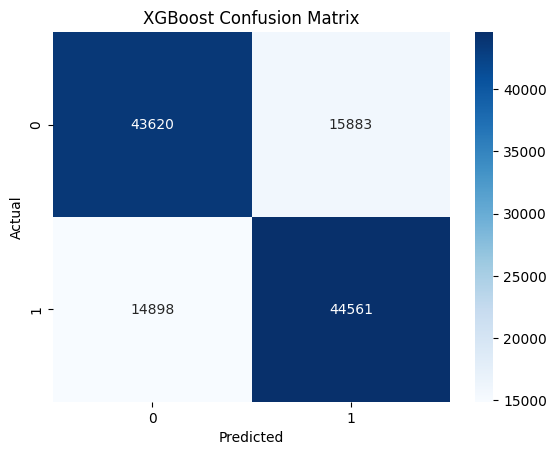

In [10]:
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',
    predictor='gpu_predictor',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42
)

xgb_grid = GridSearchCV(xgb_model, xgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
xgb_grid.fit(X_train, y_train)

xgb_pred = xgb_grid.predict(X_test)

print("✅ Best XGBoost Parameters:", xgb_grid.best_params_)
print("\n📌 XGBoost Classification Report:\n", classification_report(y_test, xgb_pred))

# Confusion Matrix
cm_xgb = confusion_matrix(y_test, xgb_pred)
sns.heatmap(cm_xgb, annot=True, fmt="d", cmap="Blues")
plt.title("XGBoost Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


/usr/local/lib/python3.11/dist-packages/joblib/externals/loky/process_executor.py:782: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  warnings.warn(


[LightGBM] [Info] Number of positive: 138736, number of negative: 138840
[LightGBM] [Info] This is the GPU trainer!!
[LightGBM] [Info] Total Bins 2904
[LightGBM] [Info] Number of data points in the train set: 277576, number of used features: 24
[LightGBM] [Info] Using GPU Device: Tesla T4, Vendor: NVIDIA Corporation
[LightGBM] [Info] Compiling OpenCL Kernel with 256 bins...
[LightGBM] [Info] GPU programs have been built
[LightGBM] [Info] Size of histogram bin entry: 8
[LightGBM] [Info] 21 dense feature groups (6.35 MB) transferred to GPU in 0.008948 secs. 1 sparse feature groups
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499813 -> initscore=-0.000749
[LightGBM] [Info] Start training from score -0.000749
✅ Best LightGBM Parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'n_estimators': 200, 'num_leaves': 31, 'subsample': 0.8}

📌 LightGBM Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.73      0.74     59503
  

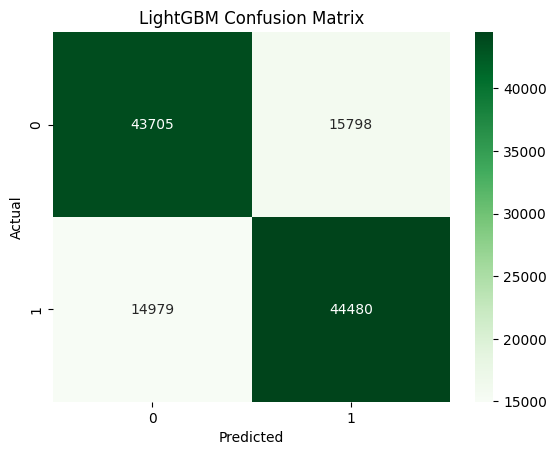

In [11]:
lgb_model = lgb.LGBMClassifier(
    objective='binary',
    device='gpu',  # remove this line if GPU not supported
    random_state=42
)

lgb_grid = GridSearchCV(lgb_model, lgb_param_grid, cv=3, scoring='accuracy', n_jobs=-1)
lgb_grid.fit(X_train, y_train)

lgb_pred = lgb_grid.predict(X_test)

print("✅ Best LightGBM Parameters:", lgb_grid.best_params_)
print("\n📌 LightGBM Classification Report:\n", classification_report(y_test, lgb_pred))

# Confusion Matrix
cm_lgb = confusion_matrix(y_test, lgb_pred)
sns.heatmap(cm_lgb, annot=True, fmt="d", cmap="Greens")
plt.title("LightGBM Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


# Final XGBoost Model with K-Fold and Saving

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:11] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Fold 1 Accuracy: 0.7399
📝 Classification Report - Fold 1:
              precision    recall  f1-score   support

           0       0.74      0.74      0.74     99172
           1       0.74      0.74      0.74     99098

    accuracy                           0.74    198270
   macro avg       0.74      0.74      0.74    198270
weighted avg       0.74      0.74      0.74    198270



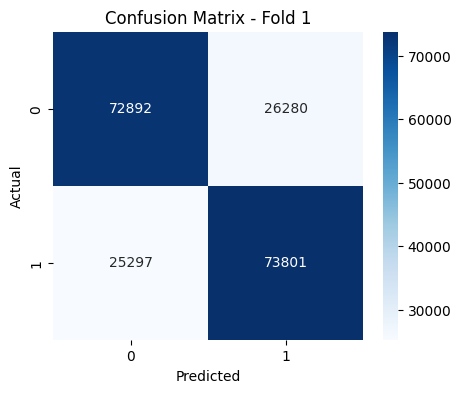

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:27] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Fold 2 Accuracy: 0.7405
📝 Classification Report - Fold 2:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74     99171
           1       0.74      0.75      0.74     99098

    accuracy                           0.74    198269
   macro avg       0.74      0.74      0.74    198269
weighted avg       0.74      0.74      0.74    198269



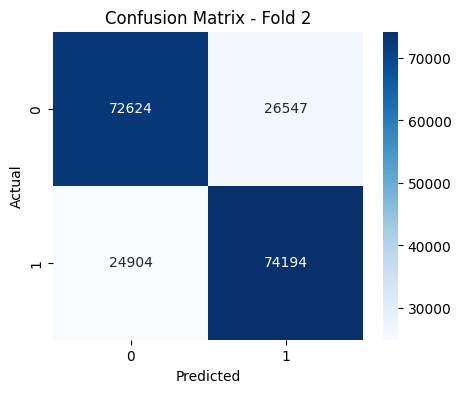

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:22:44] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Fold 3 Accuracy: 0.7388
📝 Classification Report - Fold 3:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74     99171
           1       0.74      0.75      0.74     99098

    accuracy                           0.74    198269
   macro avg       0.74      0.74      0.74    198269
weighted avg       0.74      0.74      0.74    198269



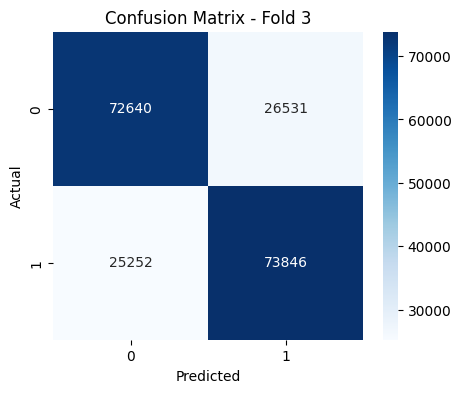

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:02] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Fold 4 Accuracy: 0.7391
📝 Classification Report - Fold 4:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74     99172
           1       0.74      0.75      0.74     99097

    accuracy                           0.74    198269
   macro avg       0.74      0.74      0.74    198269
weighted avg       0.74      0.74      0.74    198269



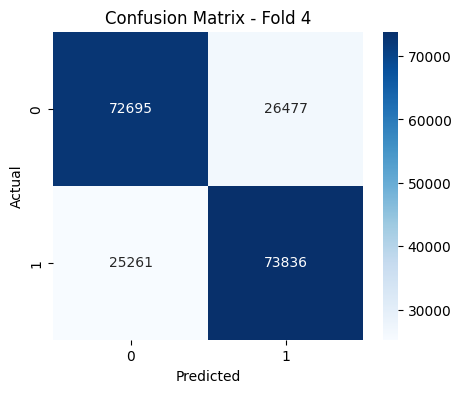

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:20] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



📊 Fold 5 Accuracy: 0.7398
📝 Classification Report - Fold 5:
              precision    recall  f1-score   support

           0       0.74      0.73      0.74     99172
           1       0.74      0.75      0.74     99097

    accuracy                           0.74    198269
   macro avg       0.74      0.74      0.74    198269
weighted avg       0.74      0.74      0.74    198269



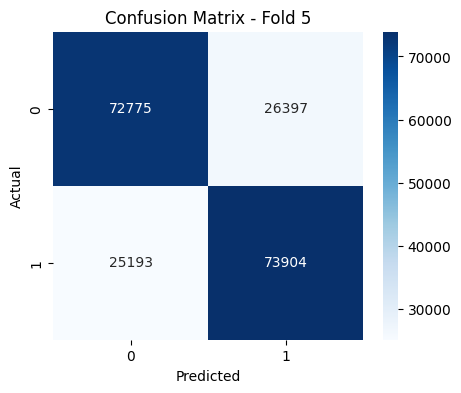

/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [14:23:37] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "predictor", "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)



✅ Final XGBoost model saved to: /content/drive/MyDrive/Colab Notebooks/ensemble/result/xgb_final_model2.joblib
📈 Average CV Accuracy: 0.7396


In [13]:
import numpy as np
import pandas as pd
import os
import xgboost as xgb
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import joblib

# Label Encoding
for col in df.select_dtypes(include='object').columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

# Split features and target
X = df.drop("DRK_YN", axis=1)
y = df["DRK_YN"]

# Best parameters (from GridSearchCV)
best_params = {
    'colsample_bytree': 0.8,
    'learning_rate': 0.1,
    'max_depth': 5,
    'n_estimators': 200,
    'subsample': 0.8
}

# Initialize model with GPU support and best parameters
xgb_model = xgb.XGBClassifier(
    objective='binary:logistic',
    tree_method='hist',
    predictor='gpu_predictor',
    use_label_encoder=False,
    eval_metric='logloss',
    random_state=42,
    **best_params
)

# 5-Fold Stratified Cross-Validation
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
fold = 1
accuracies = []

for train_idx, test_idx in kf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    xgb_model.fit(X_train, y_train)
    preds = xgb_model.predict(X_test)

    acc = accuracy_score(y_test, preds)
    accuracies.append(acc)

    print(f"\n📊 Fold {fold} Accuracy: {acc:.4f}")
    print(f"📝 Classification Report - Fold {fold}:\n{classification_report(y_test, preds)}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, preds)
    plt.figure(figsize=(5,4))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
    plt.title(f"Confusion Matrix - Fold {fold}")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.show()

    fold += 1

# Save the final model (trained on the whole dataset)
final_model_path = '/content/drive/MyDrive/Colab Notebooks/ensemble/result/xgb_final_model2.joblib'
os.makedirs(os.path.dirname(final_model_path), exist_ok=True)
xgb_model.fit(X, y)
joblib.dump(xgb_model, final_model_path)

print(f"\n✅ Final XGBoost model saved to: {final_model_path}")
print(f"📈 Average CV Accuracy: {np.mean(accuracies):.4f}")
